# Introduction
Using an existing data matrix format, we focus on the theoretical and empirical features of cosine similarity and Jaccard's similarity measures applied to document pairs in this study. Theoretical analyses will examine the efficiency of NumPy's dots product with an individual execution for cosine similarity, as well as investigate the running time complexities and significant constants. Similarly analyses will be executed to estimate run-time constants for Jaccard similarity and compare them to cosine similarity. In addition, considering both similarity measures, we will look into the worst-case running time for determining all-pairs similarities and estimate necessary constants in the run-time formulas. We will use a parallel computing approach to all-pairs similarities in order to improve efficiency, and we will look at both the theoretical and empirical improvements that can be obtained on a computer.



In [6]:
import pandas as pd

data = pd.read_csv('data2023.csv', index_col=0)
print(data)

full_data = data.values
wholepairs = []
document_list = []

for i in range(20):
    # Create a copy of the column to avoid referencing issues
    document_list.append(full_data[:, i].copy())

for i in document_list:
    for j in document_list:
        wholepairs.append([i, j])

newpairs = []

for element in wholepairs:
    # Check if the arrays are not equal element-wise
    if not (element[0] == element[1]).all():
        newpairs.append([element[0], element[1]])

print(len(newpairs))

           doc1  doc2  doc3  doc4  doc5  doc6  doc7  doc8  doc9  doc10  doc11  \
A             0     6     5     7     9    13    16    12    14     22     17   
A-tu          0     0     0     0     0     0     0     0     0      0      0   
A.            0     0     0     0     0     0     0     0     0      0      0   
ABC           0     0     0     0     1     0     0     0     0      0      0   
Aah           0     0     0     0     0     0     0     0     0      0      1   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...    ...    ...   
états         0     0     0     0     0     0     0     0     0      0      0   
étranger      0     0     0     0     0     0     0     0     0      0      0   
évidence.     0     0     0     0     0     0     0     0     0      0      0   
êtes          0     0     0     0     0     0     0     0     0      1      0   
être          0     0     0     0     0     0     0     0     0      0      1   

           doc12  doc13  do

It is a quick overview our data dataframe so it is important to know what we will use.

# 1-) Numpy Cosine and Manual Cosine Comparison and Their Theoretical and Empirical Analysis

Numpy should be faster than manual cosine similarity because of its improved efficiency and optimized libraries, according to a comparison between the two methods' cosine similarity. Numpy's anticipated superior performance is further enhanced by its parallel computation capabilities. The theoretical analysis of cosine similarity indicates a time complexity of O(n), with dot product and magnitude calculations leading to O(n)^2 and O(n) complexities, respectively. The division results in an overall time complexity of O(n) for cosine similarity.

This code is used because cosine similarity is written by using transpose. 

In [34]:
import math

import numpy as np
import time
import matplotlib.pyplot as plt
print(full_data[:, 1])
print(full_data[:, 2])
def dot(v1, v2): #it is a part of cosine function for dot product
    total = 0
    for i in range(len(v1)):
        total += v1[i] * v2[i]
    return total

def cosine(v1, v2): #it calculates cosine similarity 
    dot_product = dot(v1, v2)
    magnitude_v1 = math.sqrt(dot(v1, v1))
    magnitude_v2 = math.sqrt(dot(v2, v2))

    if magnitude_v1 == 0 or magnitude_v2 == 0:
        return 0  # Return 0 for zero magnitude vectors
    else:
        return dot_product / (magnitude_v1 * magnitude_v2)


def make_matrix(list_of_arrays): #It makes converts arrays to matrix 
    max_rows = max(arr.shape[0] for arr in list_of_arrays)
    padded_arrays = []
    for arr in list_of_arrays:
        if arr.ndim == 1:
            arr = arr.reshape(-1, 1)  # Reshape 1D array to have a single column
        pad_rows = max_rows - arr.shape[0]
        padded_arr = np.pad(arr, ((0, pad_rows), (0, 0)), mode='constant')
        padded_arrays.append(padded_arr)
    matrix = np.concatenate(padded_arrays, axis=1)
    return matrix    

def transpose(matrix): #It gets transpose vectors which is used
    transposed=[]
    for i in range(0,len(matrix[0])):
        transposed.append([row[i] for row in matrix])
        
    return transposed

#call make_matrix on whatever variable holds your list of dictionaries representation of your documents

arrays_list = [full_data[:, 0], full_data[:, 1]]  #we created our array list in correct format

amatrix = make_matrix(arrays_list) #then we converted the list to the matrix
print(amatrix)
docvectors=transpose(amatrix)

cosine(docvectors[0],docvectors[1])  #we implemented two vectors inside of the function and obtained cosine similarity


[6 0 0 ... 0 0 0]
[5 0 0 ... 0 0 0]
[[0 6]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


0.9616845260362251

It is the similarity result for manual cosine

In [36]:

import math
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.stats import linregress

def cosine2(v1, v2):  #cosine 2 is numpy cosine, which is built with special numpy libraries that's why, expectation is to
    # see numpy cosine is faster than cosine function
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    
    if norm_v1 == 0 or norm_v2 == 0:
        return 0  # Avoid division by zero
    
    return dot_product / (norm_v1 * norm_v2)

# Assuming amatrix and transpose functions are defined
docvectors2 = transpose(amatrix)
result = cosine2(docvectors2[0], docvectors2[1])
print(result)







0.9616845260362251


It is the similarity result for numpy cosine, which is used to verify if these functions provide the same similarity outcome. It is verified with the value

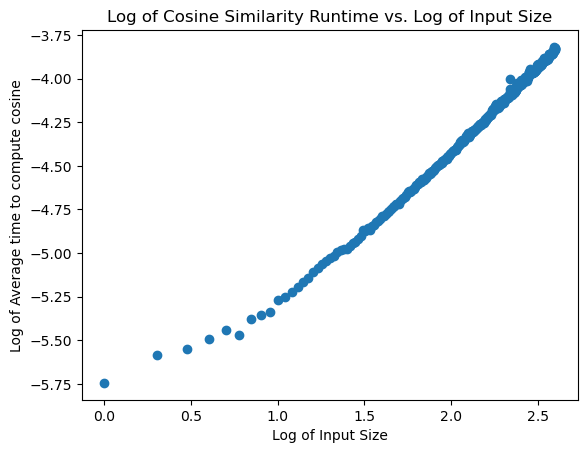

Correlation coefficient is 0.9947132596699193, Slope is 0.8926568611179158, intercept is -6.181065274738793 and intercept error is 0.010228415054065321


In [73]:
import math
import numpy as np
import time
import matplotlib.pyplot as plt
import scipy.stats as stats

def dot(v1, v2):
    total = 0
    for i in range(0, len(v1)):
        total += v1[i] * v2[i]
    return total

def cosine(v1, v2):
    dot_product = dot(v1, v2)
    magnitude_v1 = math.sqrt(dot(v1, v1))
    magnitude_v2 = math.sqrt(dot(v2, v2))
    
    if magnitude_v1 == 0 or magnitude_v2 == 0:
        return 0
    
    return dot_product / (magnitude_v1 * magnitude_v2)

def timeit(somefunc, *args, repeats=100):
    times = []
    while repeats > 0:
        starttime = time.time()
        ans = somefunc(*args)
        endtime = time.time()
        timetaken = endtime - starttime
        times.append(timetaken)
        repeats -= 1
    mean = np.mean(times)
    return mean

full_data = data.values #prepared our data

xs = []  #these lists is going to be used to plot data  
ys = []

for n in range(1, 400):  #we gonna use this in order to size of data so when use this loop the data size gonna increase one by one
    v1 = full_data[:, 1][:n]
    v2 = full_data[:, 2][:n]
    
    
    mean_time = timeit(cosine, v1, v2, repeats=5000) #we gonna repeat the same operation 5000 times. When u increase repetition, you will obtain more reliable and less deviated outcomes
    
    
    xs.append(np.log10(n))  # Log of input size
    ys.append(np.log10(mean_time))  # Log of time

res = stats.linregress(xs, ys)

plt.scatter(xs, ys)
plt.xlabel("Log of Input Size")
plt.ylabel("Log of Average time to compute cosine")
plt.title("Log of Cosine Similarity Runtime vs. Log of Input Size")
plt.show()

print("Correlation coefficient is {}, Slope is {}, intercept is {} and intercept error is {}".format(res.rvalue, res.slope, res.intercept, res.intercept_stderr))

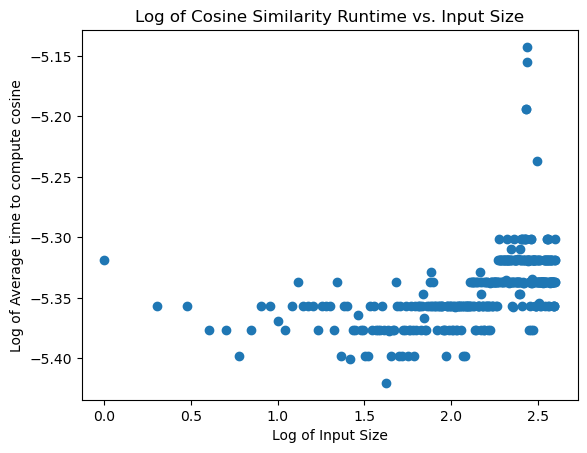

Correlation coefficient is 0.4992824110833791, Slope is 0.0345225647751301, intercept is -5.41684345977719 and intercept error is 0.006649399224992497


In [54]:
import math
import numpy as np
import time
import matplotlib.pyplot as plt
import scipy.stats as stats

def dot(v1, v2):
    total = 0
    for i in range(0, len(v1)):
        total += v1[i] * v2[i]
    return total

def cosine2(v1, v2):  #cosine 2 is numpy cosine, which is built with special numpy libraries that's why, expectation is to
    # see numpy cosine is faster than cosine function
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    
    if norm_v1 == 0 or norm_v2 == 0:
        return 0  # Avoid division by zero
    
    return dot_product / (norm_v1 * norm_v2)



def timeit(somefunc, *args, repeats=100):
    times = []
    while repeats > 0:
        starttime = time.time()
        ans = somefunc(*args)
        endtime = time.time()
        timetaken = endtime - starttime
        times.append(timetaken)
        repeats -= 1
    mean = np.mean(times)
    return mean

ffull_data = data.values

xs = []
ys = []

logxs = [np.log10(x) for x in range(1, 400)]  

for n in range(1, 400):
    v1 = full_data[:, 1][:n]
    v2 = full_data[:, 2][:n]
    
    
    mean_time = timeit(cosine2, v1, v2, repeats=5000)  #the only thing changing from the uppper code was cosine2 because it is numpy cosine function.
    #rest of the code is the same
    
    ys.append(mean_time)
    logys = [np.log10(y) for y in ys]

res = stats.linregress(logxs, logys)

plt.scatter(logxs, logys)
plt.xlabel("Log of Input Size")
plt.ylabel("Log of Average time to compute cosine")
plt.title("Log of Cosine Similarity Runtime vs. Input Size")
plt.show()

print("Correlation coefficient is {}, Slope is {}, intercept is {} and intercept error is {}".format(res.rvalue, res.slope, res.intercept, res.intercept_stderr))

# Conclusion
when you examine two graphs, you will notice the log of average time and slope of numpy cosine is less than the manual cosine function, which means it obtained the expected result since numpy should be faster according to worst-case theory. Numpy graph has a tendency to stay in less average time than normal cosine. Numpy cosine should be O(1) our slope also proves it when it comes to numpy cosine. In addition to that, our slope in manual cosine is close to 1, which means O(n) time complexity is obtained

# 2-) Theoretical and Empirical Analysis of Jaccard Similarity:


The worst-case time complexity of the intersection, union, and size computations is O(n) when it comes to Jaccard Similarity. The size of the input sets or documents has a linear trendline on the algorithm when we increase input size. Once we suppose all elements are distinct, the expectation should see O(n) because of the length of input used in Jaccard similarity. Having the intersected elements increases Jaccard Similarity's fast more and more, which means it gonna be obtain less time complexity

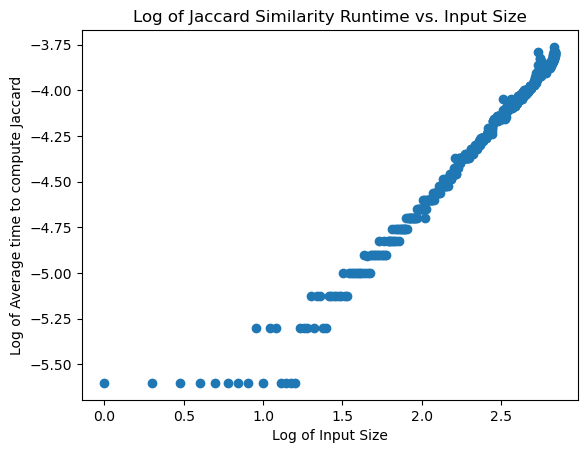

Correlation coefficient is 0.9895372236007927, Slope is 0.9062302128921186, intercept is -6.415919348374031 and intercept error is 0.012273690617490148


In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import scipy.stats as stats

data = pd.read_csv('data2023.csv', index_col=0)
full_data = data.values
# Create dictionaries for columns 2 and 3
doc2 = {i: full_data[:, 2][i] for i in range(len(full_data[:, 1]))}
doc3 = {i: full_data[:, 3][i] for i in range(len(full_data[:, 1]))}
# It calculates the total sum of values in a dictionary
def maketotal(dict1):
    return sum(dict1.values())
#Calculates jaccard similarity
def jaccard_similarity(dict1, dict2):
    intersection = {item: min(dict1[item], dict2[item]) for item in dict1 if item in dict2}
    intersection_total = maketotal(intersection)
    union = maketotal(dict1) + maketotal(dict2) - intersection_total

    if union == 0:
        return 0  # Return 0 in orde to eliminate zero division

    return intersection_total / union
# It measures the time taken for a function with multiple repeats then gets its average
def timeit(somefunc, *args, repeats=100):
    times = []
    while repeats > 0:
        starttime = time.time()
        ans = somefunc(*args)
        endtime = time.time()
        timetaken = endtime - starttime
        times.append(timetaken)
        repeats -= 1
    mean = np.mean(times)
    return mean
#It creates x axis as number of input
logxs = [np.log10(x) for x in range(1, 700)]
logys = []
#Increment sizes one by one
for n in range(1, 700):
    #It applies slicing to document every element of it keys then this keys is used to create dict
    sliced_doc2 = {key: doc2[key] for key in list(doc2)[:n]}
    sliced_doc3 = {key: doc3[key] for key in list(doc2)[:n]}
    
    # time is measured
    mean_time = timeit(jaccard_similarity, sliced_doc2, sliced_doc3, repeats=400)

    if mean_time != 0:
        logys.append(np.log10(mean_time))

#It ensures logxs and ys have the same length
logxs = logxs[:len(logys)]

res = stats.linregress(logxs, logys)

plt.scatter(logxs, logys)
plt.xlabel("Log of Input Size")
plt.ylabel("Log of Average time to compute Jaccard")
plt.title("Log of Jaccard Similarity Runtime vs. Input Size")
plt.show()

print("Correlation coefficient is {}, Slope is {}, intercept is {} and intercept error is {}".format(res.rvalue, res.slope, res.intercept, res.intercept_stderr))

# Conclusion
When you examine the graph above, you will see the slope is close to 1, which means it shows a linear effect when the input size of the graph is increased. Slope's effect was O(n^slope) which means the value is close to. So O(n), depicts that expected time complexity is obtained because O(n^0.90) is almost. 

# 3-) Empirical and Theoretical Worst-Case Running Time Analysis with Jaccard and Consine Similarity for All-Pairs 

### Theoretical Analysis

Worst Case Running time is to check all pairs for Cosine and Jaccard Similarity so Our worst scenario case should be for Jaccard and cosine to be O(n^2*vector length). The need to compare every document with every other document while calculating all-pairs similarities results in the N^2 term. Briefly, N*(N-1)/2 gonna make N^2/2 which means 2 is going to be neglected if you suppose N is so large value. In that case, we will obtain N^2. All in all, our worst-case time complexity is going to be O(n^2) for both cases, which means it needs to be seen slope is close to "2" when the data is larger enough.

In [1]:
import pandas as pd
data = pd.read_csv('data2023.csv', index_col=0)
print(data)
full_data=data.values #we prepared our data


           doc1  doc2  doc3  doc4  doc5  doc6  doc7  doc8  doc9  doc10  doc11  \
A             0     6     5     7     9    13    16    12    14     22     17   
A-tu          0     0     0     0     0     0     0     0     0      0      0   
A.            0     0     0     0     0     0     0     0     0      0      0   
ABC           0     0     0     0     1     0     0     0     0      0      0   
Aah           0     0     0     0     0     0     0     0     0      0      1   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...    ...    ...   
états         0     0     0     0     0     0     0     0     0      0      0   
étranger      0     0     0     0     0     0     0     0     0      0      0   
évidence.     0     0     0     0     0     0     0     0     0      0      0   
êtes          0     0     0     0     0     0     0     0     0      1      0   
être          0     0     0     0     0     0     0     0     0      0      1   

           doc12  doc13  do

In [12]:
document_list=[]
for i in range(20):
    document_list.append(full_data[:,i])
wholepairs=[]
for i in document_list:
    for j in document_list:
        wholepairs.append([i,j])
#It used to obtain 400 elements, which gonna be used for jaccard

[[array([0, 0, 0, ..., 0, 0, 0], dtype=int64), array([0, 0, 0, ..., 0, 0, 0], dtype=int64)], [array([0, 0, 0, ..., 0, 0, 0], dtype=int64), array([6, 0, 0, ..., 0, 0, 0], dtype=int64)], [array([0, 0, 0, ..., 0, 0, 0], dtype=int64), array([5, 0, 0, ..., 0, 0, 0], dtype=int64)], [array([0, 0, 0, ..., 0, 0, 0], dtype=int64), array([7, 0, 0, ..., 0, 0, 0], dtype=int64)], [array([0, 0, 0, ..., 0, 0, 0], dtype=int64), array([9, 0, 0, ..., 0, 0, 0], dtype=int64)], [array([0, 0, 0, ..., 0, 0, 0], dtype=int64), array([13,  0,  0, ...,  0,  0,  0], dtype=int64)], [array([0, 0, 0, ..., 0, 0, 0], dtype=int64), array([16,  0,  0, ...,  0,  0,  0], dtype=int64)], [array([0, 0, 0, ..., 0, 0, 0], dtype=int64), array([12,  0,  0, ...,  0,  0,  0], dtype=int64)], [array([0, 0, 0, ..., 0, 0, 0], dtype=int64), array([14,  0,  0, ...,  0,  0,  0], dtype=int64)], [array([0, 0, 0, ..., 0, 0, 0], dtype=int64), array([22,  0,  0, ...,  0,  1,  0], dtype=int64)], [array([0, 0, 0, ..., 0, 0, 0], dtype=int64), arr

In [2]:
document_list=[]
for i in range(20):
    document_list.append(full_data[:,i])

#each document is added as element of document list

from itertools import combinations


unique_pairs = list(combinations(document_list, 2))  # This special function is used to convert unique pairs 

print(unique_pairs)  
print(len(unique_pairs)) # We got 190. The reason is N*N-1/2 so it means 20*19/2 so that the same and symetric values are eliminated
#It gonna provide 190 unique pairs.

#you can examine unique pairs in here

[(array([0, 0, 0, ..., 0, 0, 0], dtype=int64), array([6, 0, 0, ..., 0, 0, 0], dtype=int64)), (array([0, 0, 0, ..., 0, 0, 0], dtype=int64), array([5, 0, 0, ..., 0, 0, 0], dtype=int64)), (array([0, 0, 0, ..., 0, 0, 0], dtype=int64), array([7, 0, 0, ..., 0, 0, 0], dtype=int64)), (array([0, 0, 0, ..., 0, 0, 0], dtype=int64), array([9, 0, 0, ..., 0, 0, 0], dtype=int64)), (array([0, 0, 0, ..., 0, 0, 0], dtype=int64), array([13,  0,  0, ...,  0,  0,  0], dtype=int64)), (array([0, 0, 0, ..., 0, 0, 0], dtype=int64), array([16,  0,  0, ...,  0,  0,  0], dtype=int64)), (array([0, 0, 0, ..., 0, 0, 0], dtype=int64), array([12,  0,  0, ...,  0,  0,  0], dtype=int64)), (array([0, 0, 0, ..., 0, 0, 0], dtype=int64), array([14,  0,  0, ...,  0,  0,  0], dtype=int64)), (array([0, 0, 0, ..., 0, 0, 0], dtype=int64), array([22,  0,  0, ...,  0,  1,  0], dtype=int64)), (array([0, 0, 0, ..., 0, 0, 0], dtype=int64), array([17,  0,  0, ...,  0,  0,  1], dtype=int64)), (array([0, 0, 0, ..., 0, 0, 0], dtype=int64

In [19]:
document_list = []  

dict_list=[]
mini_dict={}
for i in range(20): 
    document_list.append(full_data[:, i])  #the same process again
for i in range(len(document_list)):   
    for j in range(len(document_list[i])):
        mini_dict[j]=document_list[i][j]
    dict_list.append(mini_dict)
    mini_dict={}
whole_dict=[] 
for i in dict_list:
    for j in dict_list:
        whole_dict.append([i,j])
print(len(whole_dict))        
        
#In that code every document is converted to dict to be used for jaccard. It is used 0,1,2,3,4 instead of using words 
  #If you want examine below. Every word is converted to number since this number is going to be used key value
from itertools import combinations


unique_pairs= list(combinations(dict_list, 2))  #we created unique dicts before we just do unique dicts pairs instead of unique arrays since jaccard was expecting with dictionary
  





400


In [97]:
import pandas as pd
data = pd.read_csv('data2023.csv', index_col=0)
print(data)
full_data=data.values

document_list=[]
for i in range(20):
    document_list.append(full_data[:,i])
  


from itertools import combinations


unique_pairs = list(combinations(document_list, 2))
for pair in unique_pairs:
        print(pair)
        
#When it comes to here these things gonna be used for cosine because data is provided in array format



           doc1  doc2  doc3  doc4  doc5  doc6  doc7  doc8  doc9  doc10  doc11  \
A             0     6     5     7     9    13    16    12    14     22     17   
A-tu          0     0     0     0     0     0     0     0     0      0      0   
A.            0     0     0     0     0     0     0     0     0      0      0   
ABC           0     0     0     0     1     0     0     0     0      0      0   
Aah           0     0     0     0     0     0     0     0     0      0      1   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...    ...    ...   
états         0     0     0     0     0     0     0     0     0      0      0   
étranger      0     0     0     0     0     0     0     0     0      0      0   
évidence.     0     0     0     0     0     0     0     0     0      0      0   
êtes          0     0     0     0     0     0     0     0     0      1      0   
être          0     0     0     0     0     0     0     0     0      0      1   

           doc12  doc13  do

IT IS LOG OF JACCARD SIMILARITY 200 SIZE

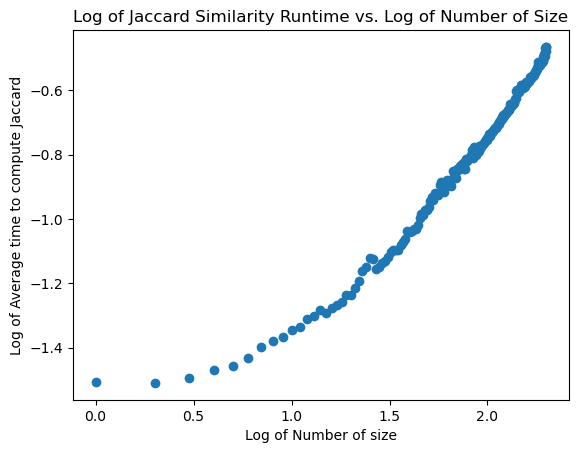

Correlation coefficient is 0.9760320982012224, Slope is 0.6155554480822736, intercept is -1.9609726126149098 and intercept error is 0.018723253698011467


In [47]:
import math
import numpy as np
import time
import matplotlib.pyplot as plt
import scipy.stats as stats
from itertools import combinations

def maketotal(dict1):
    total=0
    for item in dict1:
        total += dict1[item]
    return total

def jaccard_similarity(dict1, dict2):
    intersection = {}
    for item in dict1.keys():
        if item in dict2.keys():
            intersection[item] = min(dict1[item], dict2[item])
            
    intersection_total = maketotal(intersection)
    union = maketotal(dict1) + maketotal(dict2) - intersection_total
    
    if union == 0:
        return 0  # Return 0 to avoid division by zero
    else:
        return intersection_total / union  # Return Jaccard similarity value
def timeit(somefunc, *args, repeats=100):
    times = []
    while repeats > 0:
        starttime = time.time()
        ans = somefunc(*args)
        endtime = time.time()
        timetaken = endtime - starttime
        times.append(timetaken)
        repeats -= 1
    mean = np.mean(times)
    return mean    
document_list = []  #It gonna be used to create list so every document gonna be inside of the list in array format
dict_list=[]
mini_dict={} #reset dict, which gonna be used again and again to carry dictionary elements in suitable format just like a container
data1 = data.iloc[0:1000]  # Consider the first 1000 rows
full_data = data1.values  # data converted to matrice
#This code converts array elements to dictionary format by assigining their keys like 0 1 2 3 and value gonna be array elements. index value gonna be key value at the same time with the code
for i in range(20):
    document_list.append(full_data[:, i])
for i in range(len(document_list)):
    for j in range(len(document_list[i])):
        mini_dict[j]=document_list[i][j]
    dict_list.append(mini_dict)
    mini_dict={}

#--------------------------------------------------------------------
unique_pairs = list(combinations(dict_list, 2)) #obtained unique list

logxs = [np.log10(x) for x in range(1, 201)]
logys = []  # Initialize logys list 

for n in range(200): #It is used to control size of the input
    times = []
    start_time = time.time()
    for pair in unique_pairs:
        for i in range(20): #It is repetition
            d1_keys = list(pair[0].keys())[:n]  # Take the first n number of keys from the first dictionary with slicing assigned the list
            d2_keys = list(pair[1].keys())[:n]  # Take the first n number of keys from the first dictionary with slicing assigned the list
            d1_sliced = {key: pair[0][key] for key in d1_keys}  # ıt created a sliced dictionary by using particular keys
            d2_sliced = {key: pair[1][key] for key in d2_keys}  # ıt created a sliced dictionary by using particular keys
            jaccard_similarity(d1_sliced, d2_sliced) #jaccard implemend
            
    end_time = time.time()
    time_taken = end_time - start_time
    times.append(time_taken)
    logys.append(np.log10(np.mean(times)))

# It ensures logys and logxs posses the same length
logys = logys[:len(logxs)]

res = stats.linregress(logxs, logys)

plt.scatter(logxs, logys)
plt.xlabel("Log of Number of size")
plt.ylabel("Log of Average time to compute Jaccard")
plt.title("Log of Jaccard Similarity Runtime vs. Log of Number of Size")
plt.show()

print("Correlation coefficient is {}, Slope is {}, intercept is {} and intercept error is {}".format(res.rvalue, res.slope, res.intercept, res.intercept_stderr))


It is examined slope for 200 data size first of all for jaccard

IT IS LOG OF JACCARD FOR 1000 SIZE

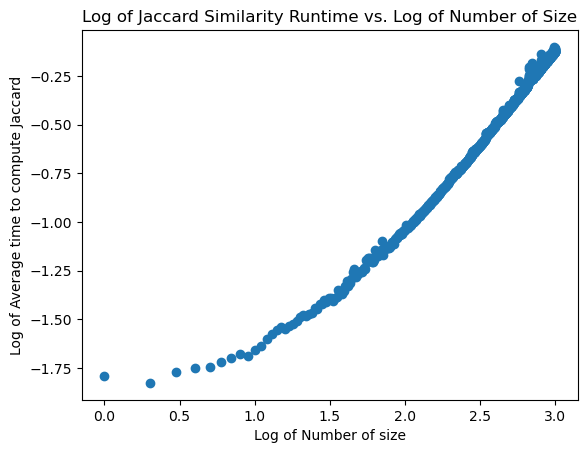

Correlation coefficient is 0.9881504105868062, Slope is 0.8232461067239786, intercept is -2.626767075644506 and intercept error is 0.010536365154506885


In [7]:
import math
import numpy as np
import time
import matplotlib.pyplot as plt
import scipy.stats as stats
from itertools import combinations

def maketotal(dict1):
    total=0
    for item in dict1:
        total += dict1[item]
    return total

def jaccard_similarity(dict1, dict2):
    intersection = {}
    for item in dict1.keys():
        if item in dict2.keys():
            intersection[item] = min(dict1[item], dict2[item])
            
    intersection_total = maketotal(intersection)
    union = maketotal(dict1) + maketotal(dict2) - intersection_total
    
    if union == 0:
        return 0  # It eliminates 0 division values
    else:
        return intersection_total / union  # Return Jaccard similarity value
def timeit(somefunc, *args, repeats=100):
    times = []
    while repeats > 0:
        starttime = time.time()
        ans = somefunc(*args)
        endtime = time.time()
        timetaken = endtime - starttime
        times.append(timetaken)
        repeats -= 1
    mean = np.mean(times)
    return mean    
document_list = []  

dict_list=[]
mini_dict={}
data1 = data.iloc[0:1000]  # It picked the first 1000 rows of data, which is still in dataframe format
full_data = data1.values  #converted to matrice in order to process it
#This code converts array elements to dictionary format by assigining their keys like 0 1 2 3 and value gonna be array elements. index value gonna be key value at the same time with the code
for i in range(20):
    document_list.append(full_data[:, i])
for i in range(len(document_list)):
    for j in range(len(document_list[i])):
        mini_dict[j]=document_list[i][j]
    dict_list.append(mini_dict)
    mini_dict={}


unique_pairs = list(combinations(dict_list, 2))

logxs = [np.log10(x) for x in range(1, 1001)]
logys = []  # Initialize logys list 

for n in range(1000):  #It is used to control size of the input
    times = []
    start_time = time.time()
    for pair in unique_pairs:
        for i in range(10):
            d1_keys = list(pair[0].keys())[:n]  # Take the first n number of keys from the first dictionary with slicing assigned the list
            d2_keys = list(pair[1].keys())[:n]  # Take the first n number of keys from the first dictionary with slicing assigned the list
            d1_sliced = {key: pair[0][key] for key in d1_keys} # ıt created a sliced dictionary by using particular keys
            d2_sliced = {key: pair[1][key] for key in d2_keys} # ıt created a sliced dictionary by using particular keys
            jaccard_similarity(d1_sliced, d2_sliced)
            
    end_time = time.time()
    time_taken = end_time - start_time
    times.append(time_taken)
    logys.append(np.log10(np.mean(times)))

# Ensure logys and logxs have the same length
logys = logys[:len(logxs)]

res = stats.linregress(logxs, logys)

plt.scatter(logxs, logys)
plt.xlabel("Log of Number of size")
plt.ylabel("Log of Average time to compute Jaccard")
plt.title("Log of Jaccard Similarity Runtime vs. Log of Number of Size")
plt.show()

print("Correlation coefficient is {}, Slope is {}, intercept is {} and intercept error is {}".format(res.rvalue, res.slope, res.intercept, res.intercept_stderr))


It is also examined if slope is going to increase for 1000 data size by implementing all pairs. It is seen that 

IT IS LOG VERSION COSINE FOR ALL PAIRS 200 SIZE

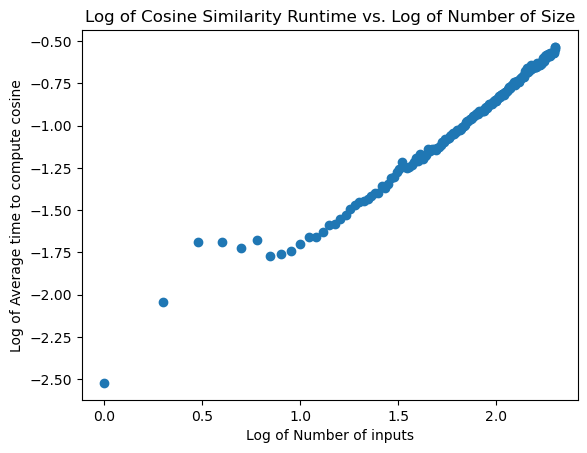

Correlation coefficient is 0.9888341965811814, Slope is 0.8243064446927404, intercept is -2.482398394902702 and intercept error is 0.01694633289305321


In [9]:
import math
import numpy as np
import time
import matplotlib.pyplot as plt
import scipy.stats as stats
from itertools import combinations

def dot(v1, v2):
    total = 0
    for i in range(0, len(v1)):
        total += v1[i] * v2[i]
    return total

def cosine(v1, v2):
    dot_product = dot(v1, v2)
    magnitude_v1 = math.sqrt(dot(v1, v1))
    magnitude_v2 = math.sqrt(dot(v2, v2))
    
    if magnitude_v1 == 0 or magnitude_v2 == 0:
        return 0
    
    return dot_product / (magnitude_v1 * magnitude_v2)


def timeit(somefunc, *args, repeats=100):
    times = []
    while repeats > 0:
        starttime = time.time()
        ans = somefunc(*args)
        endtime = time.time()
        timetaken = endtime - starttime
        times.append(timetaken)
        repeats -= 1
    mean = np.mean(times)
    return mean
document_list = []
for i in range(20):
    document_list.append(full_data[:, i])

unique_pairs = list(combinations(document_list, 2))

logxs = [np.log10(x) for x in range(1, 201)] #x axis for plot
logys = []  # y axis for plot
times = [] #saves times 

for n in range(200): #control size of the input
    times = [] #It resets itself
    start_time = time.time()
    for pair in unique_pairs:
    
        for i in range(20): #repetition amount
            
            v1 = pair[0][:n] #control size of the one pair
            v2 = pair[1][:n] #control size of the one pair
            cosine(v1, v2)
    end_time = time.time()
    time_taken = end_time - start_time
    times.append(time_taken)
   
    

    logys.append(np.log10(np.mean(times)))  # Append the average time outside the inner loop then process average value for 20 repetition


logys = logys[:len(logxs)]

res = stats.linregress(logxs, logys)

plt.scatter(logxs, logys)
plt.xlabel("Log of Number of inputs")
plt.ylabel("Log of Average time to compute cosine")
plt.title("Log of Cosine Similarity Runtime vs. Log of Number of Size")
plt.show()

print("Correlation coefficient is {}, Slope is {}, intercept is {} and intercept error is {}".format(res.rvalue, res.slope, res.intercept, res.intercept_stderr))

LOG OF COSINE FOR 1000 SIZE

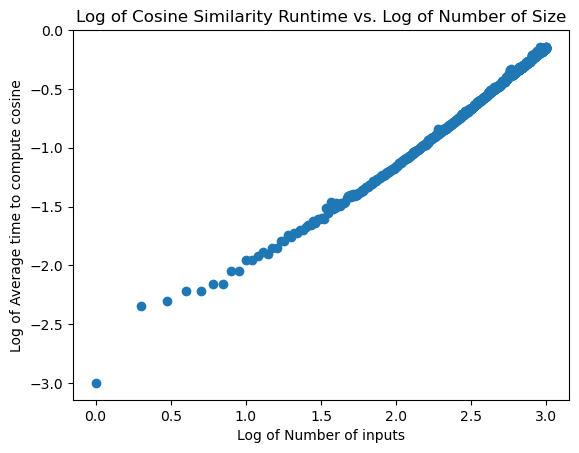

Correlation coefficient is 0.9975764526780623, Slope is 0.9596619296163801, intercept is -3.041959007558111 and intercept error is 0.005515151509581416


In [6]:
import math
import numpy as np
import time
import matplotlib.pyplot as plt
import scipy.stats as stats
from itertools import combinations
import pandas as pd
data = pd.read_csv('data2023.csv', index_col=0)
full_data=data.values

def dot(v1, v2):
    total = 0
    for i in range(0, len(v1)):
        total += v1[i] * v2[i]
    return total

def cosine(v1, v2):
    dot_product = dot(v1, v2)
    magnitude_v1 = math.sqrt(dot(v1, v1))
    magnitude_v2 = math.sqrt(dot(v2, v2))
    
    if magnitude_v1 == 0 or magnitude_v2 == 0:
        return 0
    
    return dot_product / (magnitude_v1 * magnitude_v2)


def timeit(somefunc, *args, repeats=100):
    times = []
    while repeats > 0:
        starttime = time.time()
        ans = somefunc(*args)
        endtime = time.time()
        timetaken = endtime - starttime
        times.append(timetaken)
        repeats -= 1
    mean = np.mean(times)
    return mean
document_list = []
for i in range(20):
    document_list.append(full_data[:, i]) #appended doc arrays inside of the list

unique_pairs = list(combinations(document_list, 2)) #obtain unique 190 pairs

logxs = [np.log10(x) for x in range(1, 1001)]#x axis for plot
logys = []  # y axis for plot
times = []

for n in range(1000):#control size of the input
    times = []#It resets itself
    start_time = time.time()
    for pair in unique_pairs:
    
        for i in range(10):#repetition amount
            
            v1 = pair[0][:n] #control size of the one pair
            v2 = pair[1][:n] #control size of the one pair
            cosine(v1, v2)
    end_time = time.time()
    time_taken = end_time - start_time
    times.append(time_taken)
   
    

    logys.append(np.log10(np.mean(times)))  # Append the average time outside the inner loop



res = stats.linregress(logxs, logys)

plt.scatter(logxs, logys)
plt.xlabel("Log of Number of inputs")
plt.ylabel("Log of Average time to compute cosine")
plt.title("Log of Cosine Similarity Runtime vs. Log of Number of Size")
plt.show()

print("Correlation coefficient is {}, Slope is {}, intercept is {} and intercept error is {}".format(res.rvalue, res.slope, res.intercept, res.intercept_stderr))

As you can see that, when we increase number of data size, slope has an increase tendency

In that part, Cosine and Jaccard Similarities are examined when whole values are implemented including symmetric pairs so the expectation is to see that Jaccard is faster than cosine. When it comes to Jaccard, the number of intersected elements increases, and time complexity should be less and less. J(A, B)=J(B, A). Symmetric elements are counted so when we involve whole pairs with symmetric values, jaccard should depict better performance than cosine since cosine must apply every computation regardless of its symmetric.

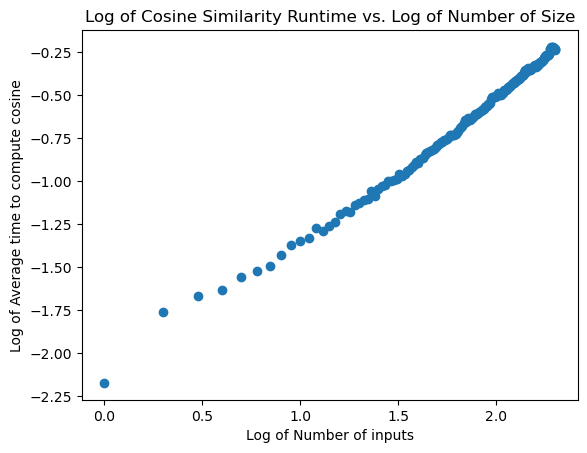

Correlation coefficient is 0.9967517388897407, Slope is 0.8557115030237943, intercept is -2.219249384767687 and intercept error is 0.009431789664023743


In [13]:
import math
import numpy as np
import time
import matplotlib.pyplot as plt
import scipy.stats as stats
from itertools import combinations

def dot(v1, v2):
    total = 0
    for i in range(0, len(v1)):
        total += v1[i] * v2[i]
    return total

def cosine(v1, v2):
    dot_product = dot(v1, v2)
    magnitude_v1 = math.sqrt(dot(v1, v1))
    magnitude_v2 = math.sqrt(dot(v2, v2))
    
    if magnitude_v1 == 0 or magnitude_v2 == 0:
        return 0
    
    return dot_product / (magnitude_v1 * magnitude_v2)


def timeit(somefunc, *args, repeats=100):
    times = []
    while repeats > 0:
        starttime = time.time()
        ans = somefunc(*args)
        endtime = time.time()
        timetaken = endtime - starttime
        times.append(timetaken)
        repeats -= 1
    mean = np.mean(times)
    return mean
document_list=[]
for i in range(20):
    document_list.append(full_data[:,i])  #arrays added here
wholepairs=[] #It gonna save 400 values
for i in document_list:  
    for j in document_list:
        wholepairs.append([i,j])  #400 values is saved

unique_pairs = wholepairs #the same process repeated again only difference we assigned the list holding 400 hundred values
#---------------------------REST OF THE CODE EXACTLY THE SAME AS PREVIOUS COSINES FOR QUESTION 3-------------------------#
logxs = [np.log10(x) for x in range(1, 201)]
logys = []  
times = []

for n in range(200):
    times = []
    start_time = time.time()
    for pair in unique_pairs:
    
        for i in range(20):
            
            v1 = pair[0][:n]
            v2 = pair[1][:n]
            cosine(v1, v2)
    end_time = time.time()
    time_taken = end_time - start_time
    times.append(time_taken)
   
    

    logys.append(np.log10(np.mean(times)))  # Append the average time outside the inner loop


logys = logys[:len(logxs)]

res = stats.linregress(logxs, logys)

plt.scatter(logxs, logys)
plt.xlabel("Log of Number of inputs")
plt.ylabel("Log of Average time to compute cosine")
plt.title("Log of Cosine Similarity Runtime vs. Log of Number of Size")
plt.show()

print("Correlation coefficient is {}, Slope is {}, intercept is {} and intercept error is {}".format(res.rvalue, res.slope, res.intercept, res.intercept_stderr))

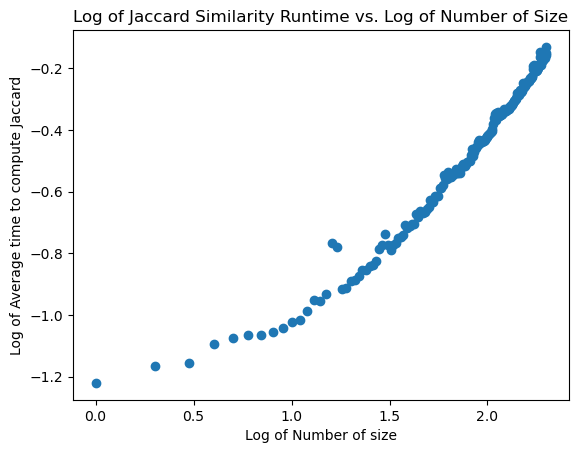

Correlation coefficient is 0.9738954751657893, Slope is 0.6080100630500075, intercept is -1.6149326748491677 and intercept error is 0.019332349066619264


In [20]:
import math
import numpy as np
import time
import matplotlib.pyplot as plt
import scipy.stats as stats
from itertools import combinations

def maketotal(dict1):
    total=0
    for item in dict1:
        total += dict1[item]
    return total

def jaccard_similarity(dict1, dict2):
    intersection = {}
    for item in dict1.keys():
        if item in dict2.keys():
            intersection[item] = min(dict1[item], dict2[item])
            
    intersection_total = maketotal(intersection)
    union = maketotal(dict1) + maketotal(dict2) - intersection_total
    
    if union == 0:
        return 0  # Return 0 to avoid division by zero
    else:
        return intersection_total / union  # Return Jaccard similarity value
def timeit(somefunc, *args, repeats=100):
    times = []
    while repeats > 0:
        starttime = time.time()
        ans = somefunc(*args)
        endtime = time.time()
        timetaken = endtime - starttime
        times.append(timetaken)
        repeats -= 1
    mean = np.mean(times)
    return mean    
document_list = []   #holds docs as list elements

dict_list=[]   #holds array in dict format
mini_dict={}  #carry dict
data1 = data.iloc[0:1000]  # Squeze ur matrice to 1000 rows
full_data = data1.values  # Replace 'data' with your actual DataFrame
#This code converts array elements to dictionary format by assigining their keys like 0 1 2 3 and value gonna be array elements. index value gonna be key value at the same time with the code
for i in range(20):
    document_list.append(full_data[:, i])
for i in range(len(document_list)):
    for j in range(len(document_list[i])):
        mini_dict[j]=document_list[i][j]
    dict_list.append(mini_dict)
    mini_dict={}


whole_dict=[] #Hold 400 values 20x20=400
for i in dict_list:
    for j in dict_list:
        whole_dict.append([i,j])
unique_pairs=whole_dict    

logxs = [np.log10(x) for x in range(1, 201)]  #Size match
logys = []  # Initialize logys list 

for n in range(200):  #sizes matched for 200 input size
    times = []  #time list reset itself it is used to hold time for 20 repetitions
    start_time = time.time()
    for pair in unique_pairs:
        for i in range(20):
            d1_keys = list(pair[0].keys())[:n]  # apply sliciing to keys for called pair
            d2_keys = list(pair[1].keys())[:n]  # apply sliciing to keys for called pair
            d1_sliced = {key: pair[0][key] for key in d1_keys}  # ıt creates a sliced dictionary with selected keys
            d2_sliced = {key: pair[1][key] for key in d2_keys}  # ıt creates a sliced dictionary with selected keys
            jaccard_similarity(d1_sliced, d2_sliced)
            
    end_time = time.time()
    time_taken = end_time - start_time
    times.append(time_taken)
    logys.append(np.log10(np.mean(times)))


logys = logys[:len(logxs)]

res = stats.linregress(logxs, logys)

plt.scatter(logxs, logys)
plt.xlabel("Log of Number of size")
plt.ylabel("Log of Average time to compute Jaccard")
plt.title("Log of Jaccard Similarity Runtime vs. Log of Number of Size")
plt.show()

print("Correlation coefficient is {}, Slope is {}, intercept is {} and intercept error is {}".format(res.rvalue, res.slope, res.intercept, res.intercept_stderr))


When you examine the Log of the Average time of two graphs, you can see that jaccard is quicker than cosine, which was the expected result because jaccard did not count symmetric values and the same values. J(A, B)= ∣A∩B∣/∣A∪B∣. All in all, The time complexity was much better than Jaccard Jaccard:O(n^0.6)>Cosine: O(n^0.85) in terms of time complexity efficiency



#### Empirical Findings
*All Pairs Jaccard Similarity: Size 200 Slope 0.61

*All Pairs Jaccard Similarity: Size 1000 Slope 0.82

*All Pairs Cosine Similarity: Size 200 Slope 0.82

*All Pairs Cosine Similarity: Size 1000 Slope 0.95

When the input size reaches 20,000, the slope tends to approach "2" as the graph sizes increase, showing an O(n^2) time complexity. However, calculations larger than 1,000 were not possible due to computational constraints. Notably, the increasing slope pattern shows that for larger sizes, the time complexity is expected to rise beyond O(n^2).
As anticipated, the 1000 size raises in time complexity for the 200. Reduced time complexity (O(n^slope)) is implied by a lower slope, which translates to faster algorithmic performance. Since there are more 0s in the dataset than Cosine, Jaccard has an advantage over Cosine in terms of calculations. This observation is valid for each examined pair and also for unique pairs.



# 4-) Theoretical and Empirical Analysis of Cosine Similarity for All-Pairs by Using Parallel Computing


Firstly, when it is considered worst case scenarios for cosine similarity and parallel cosine similarity, which is O(N^2*d(size of matrice)) and O(n^2*d/P) respectively. As you can see if the number of processors increases, it gonna be obtained less time complexity, which means the algorithm will be able to execute in less time. That's why, Parallel Computing is used to minimize spent time for execution of the code. Speed-up can be calculated by dividing the sequential version and parallel computing version of the code by each other so that it needs to be seen time complexity is reduced.

### Amhdal Laws Speedup

This code is shown speed up relation  when we increase number of processors

In [5]:
import numpy as np


P = 1  
N_values = np.arange(1, 8) 


speedup_values = 1 / ((1 - P) + P / N_values)


for N, speedup in zip(N_values, speedup_values):
    print(f"Speedup for {N} processes: {speedup:.2f}")
#This code basically provides proportionality and guide. It is important to understand if done paralel computing meets the speed up criteria in here

Speedup for 1 processes: 1.00
Speedup for 2 processes: 2.00
Speedup for 3 processes: 3.00
Speedup for 4 processes: 4.00
Speedup for 5 processes: 5.00
Speedup for 6 processes: 6.00
Speedup for 7 processes: 7.00


The code is used in order to measure sequential input results, which gonna be used for speedup comparison

In [16]:
import math
import numpy as np
import time
import matplotlib.pyplot as plt
import scipy.stats as stats
from itertools import combinations

def dot(v1, v2):
    total = 0
    for i in range(0, len(v1)):
        total += v1[i] * v2[i]
    return total

def cosine(v1, v2):
    dot_product = dot(v1, v2)
    magnitude_v1 = math.sqrt(dot(v1, v1))
    magnitude_v2 = math.sqrt(dot(v2, v2))
    
    if magnitude_v1 == 0 or magnitude_v2 == 0:
        return 0
    
    return dot_product / (magnitude_v1 * magnitude_v2)


def timeit(somefunc, *args, repeats=100):
    times = []
    while repeats > 0:
        starttime = time.time()
        ans = somefunc(*args)
        endtime = time.time()
        timetaken = endtime - starttime
        times.append(timetaken)
        repeats -= 1
    mean = np.mean(times)
    return mean
document_list = []
for i in range(20):  #elements added to list
    document_list.append(full_data[:, i])

unique_pairs = list(combinations(document_list, 2))  #Provided unique elements

logxs = [np.log10(x) for x in range(1, 201)]
logys = []  # Initialize logys list outside the loop
times = []
start_time = time.time()
 

for pair in unique_pairs:
    v1 = pair[0][:20000]  # 20k input length picked
    v2 = pair[1][:20000]
    cosine(v1, v2)
end_time = time.time()
 
time_taken=end_time-start_time
print("the time is {} ".format(time_taken))
    

  

the time is 1.5304806232452393 


In [34]:
from multiprocessing import Pool
import time
import defs
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from itertools import combinations
import pandas as pd


# the function is used for parallel computation using multiprocessing
def core_investigation2(num_repeats, num_processes, num_loops):
    a = math.floor(num_repeats / num_processes)
    # It calculates the number of repeats for each process
    document_list = []
    
    data = pd.read_csv('data2023.csv', index_col=0)
    full_data = data.values
    # carry docs to list as array elements
    for i in range(20):
        document_list.append(full_data[:, i])
    
    unique_pairs = list(combinations(document_list, 2))  #It is used to obtain unique pairs 20*19/2=190 which means all pair similarities
    modified_unique_pairs = [list(pair) for pair in unique_pairs]
    # It makes an iteration for the calculated number of repeats for each process  
    for i in range(a):
        # Create a list of inputs for each process
        inputs = [num_loops] * num_processes
        # It creates a Pool of processes and map the function to be able to use for parallel computation
        pool_of_processes = Pool(processes=num_processes)
        #Parallel_Computation_Cosine is file name  parallel_computation_cosine function name, modified unique pairs is a element which is neccessary to be able to calculate cosine similarity calculation
        pool_of_processes.map(Parallel_Computation_Cosine.parallel_computation_cosine, modified_unique_pairs)
        pool_of_processes.close()
     # Other repeats are not covered in first looop
    
    inputs = [num_loops] * (num_repeats - a * num_processes)
    pool_of_processes = Pool(processes=num_processes)
    pool_of_processes.map(Parallel_Computation_Cosine.parallel_computation_cosine, modified_unique_pairs)
    pool_of_processes.close()
# Import our for parallel computation module
import Parallel_Computation_Cosine

In [74]:
times=[]
#this code is used to iterate number of process with certain num_repeat and num_loop value
for p in range(1,21):
    starttime=time.time()
    
    core_investigation2(6,p,100000)
    
    endtime=time.time()
    timetaken=endtime-starttime
    
    times.append(timetaken)
    print("It takes {}".format(timetaken))
    print(p)


It takes 1.5154471397399902
1
It takes 0.9464411735534668
2
It takes 0.7183756828308105
3
It takes 0.4657011032104492
4
It takes 0.44518542289733887
5
It takes 0.45389366149902344
6
It takes 0.2578740119934082
7
It takes 0.25737714767456055
8
It takes 0.27043771743774414
9
It takes 0.27851152420043945
10
It takes 0.2992684841156006
11
It takes 0.3391702175140381
12
It takes 0.32561492919921875
13
It takes 0.3287477493286133
14
It takes 0.3461616039276123
15
It takes 0.36905741691589355
16
It takes 0.37702226638793945
17
It takes 0.4049525260925293
18
It takes 0.39592623710632324
19
It takes 0.453754186630249
20


calculated time shown above when num of processors are increased

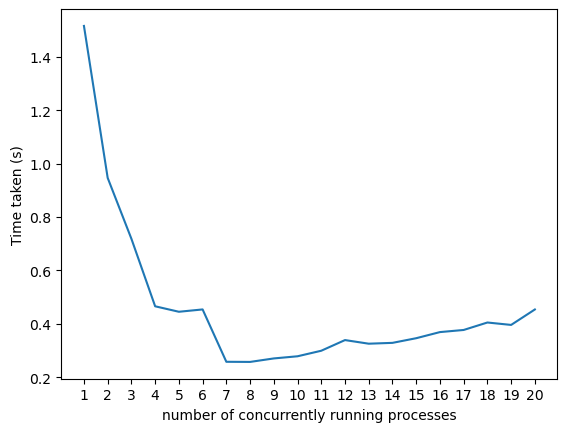

In [75]:
c=[]
for p in range(1,21):
    c.append(p)

plt.plot(c,times)
plt.xlabel("number of concurrently running processes")
plt.ylabel("Time taken (s)")
plt.xticks(c)
plt.show()

# Conclusion

#### Empirical Findings

According to the findings, you can see there is a reduction in time taken because of number of processors increased. after a certain point, the graph shows a tendency to increase, the main reason is a certain number of processors is designed for efficiency so, in that case, it is 7 or 8 for the computer. In addition to that, when is amhdal law implemented, the speed-up is also overlapped the result when sequential cosine and parallel computing cosine to each other. The ratio almost overlaps with each other, which is the expected outcome. you can check it in below

*1.5304806232452393/1.5154471397399902=1.01

*1.5304806232452393/0.94644117355346689=1.70

*1.5304806232452393/0.7183756828308105=2.15

*1.5304806232452393/0.4657011032104492=3.32


according to the speed-up values shown above, which is quite close to Ahmdal law.

All in all, the speed up is observed when a number of parallel processors. In addition to that, a number of processors used for efficiency is also examined when the plot is examined. Therefore, empirical and theoretical findings were overlapping with each other

# 5-) Empirical and Theoretical Analysis of Strassen and Comparison with Cosine Similarity using dot product method

The Strassen method exceeds typical matrix multiplication (O(n^3)) in accelerate (O(n^2.81)). This quickness advantage can be seen by larger input sizes, which predict faster results than the experiment's manual cosine.


### Approach  

We create 20x20 matrices for each of our 20 documents in order to answer the question using the given hint. The Strassen method is used to multiply these matrices, which represent parts of our data. For multiplication, we transpose the data regardless of the 20x20 matrix does not align with the entire rows in the data frame. There are unique pairs in the lower and upper triangular parts of the resulting 400-sized matrix and symmetric index value pairs in the cross part. We create 20x20 dot product outcome matrix by applying this method to conquer the whole data frame. Based on the values for the matrix index, we modify the cosine function appropriately, call the necessary values, and use the Strassen method for the cosine similarity. Finally, we compare Strassen against manual cosine for different sizes, including nearly full length and verify cosine similarity results to ensure accuracy in time comparisons. In essence, our approach optimizes cosine calculations using the Strassen method.


In [11]:
import pandas as pd
data = pd.read_csv('data2023.csv', index_col=0)
print(data)
full_data=data.values

           doc1  doc2  doc3  doc4  doc5  doc6  doc7  doc8  doc9  doc10  doc11  \
A             0     6     5     7     9    13    16    12    14     22     17   
A-tu          0     0     0     0     0     0     0     0     0      0      0   
A.            0     0     0     0     0     0     0     0     0      0      0   
ABC           0     0     0     0     1     0     0     0     0      0      0   
Aah           0     0     0     0     0     0     0     0     0      0      1   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...    ...    ...   
états         0     0     0     0     0     0     0     0     0      0      0   
étranger      0     0     0     0     0     0     0     0     0      0      0   
évidence.     0     0     0     0     0     0     0     0     0      0      0   
êtes          0     0     0     0     0     0     0     0     0      1      0   
être          0     0     0     0     0     0     0     0     0      0      1   

           doc12  doc13  do

Strassen 2500

In [12]:
import math
import numpy as np
import time
import matplotlib.pyplot as plt
from multiprocessing import Pool
import pandas as pd
data = pd.read_csv('data2023.csv', index_col=0)

full_data=data.values

# Function to segment a matrix into submatrices
def segment(M):
    n = len(M) // 2
    a = M[:n, :n]
    b = M[:n, n:]
    c = M[n:, :n]
    d = M[n:, n:]
    return a, b, c, d

# Function to build a matrix from submatrices
def build(a, b, c, d):
    (mm,nn)=np.shape(a)
    C=np.zeros([2*mm,2*mm])
    
    C[:mm,:mm]=a
    C[:mm,mm:]=b
    C[mm:,:mm]=c
    C[mm:,mm:]=d
            
    return C

# Strassen's algorithm for matrix multiplication
def strassen(M1, M2):
    if len(M1) <= 64:  # Base case, using normal multiplication for small matrices
        return np.dot(M1, M2)

    a, b, c, d = segment(M1)
    e, g, f, h = segment(M2)

    P1 = strassen(a, g - h)
    P2 = strassen(a + b, h)
    P3 = strassen(c + d, e)
    P4 = strassen(d, f - e)
    P5 = strassen(a + d, e + h)
    P6 = strassen(b - d, f + h)
    P7 = strassen(a - c, e + g)

    r = P5 + P4 - P2 + P6
    s = P1 + P2
    t = P3 + P4
    u = P5 - P3 - P7 + P1

    return build(r, s, t, u)



def cosine(index1, index2,strassen_matrices): #new cosine function index1 and index2 holds index values. This values are used to bring element from strassen matrices
    #strassen matrice basically holds all dot product results for every documenet pairs. this index values is used to call these values whatever it is used
    strassen_dot_product1 = strassen_matrices[index1,index1]  #It brought specific dot product result with like 1,1 and 2,2
    strassen_dot_product2 = strassen_matrices[index2,index2]#It brought specific dot product result like 
    strassen_dot_product_result=strassen_matrices[index1,index2] #It is dot product result for two different pairs
    magnitude_v1 = math.sqrt(strassen_dot_product1)  
    magnitude_v2 = math.sqrt(strassen_dot_product2)
    
    if magnitude_v1 == 0 or magnitude_v2 == 0:
        return 0
    
    return strassen_dot_product_result / (magnitude_v1 * magnitude_v2)  
#instead of using dot product, it is used a matrice with strassen multiplication holding all dot product results, which is just like a source




matrices1 = first_matrices=full_data[:20,:20]  
matrices2 = transpose_matrices=first_matrices.T

# Perform matrix multiplication using Strassen's algorithm
result = strassen(matrices2, matrices1) #Obtained strassen matrice holding dot product results when we used for cosine but multiplication method is strassen this time

# Extracting lower triangular matrix
lower_triangular = np.tril(result)


# Get indices of non-zero elements in lower triangular matrix
indices_lower_triangular = np.tril_indices(len(lower_triangular), k=0)
non_zero_values_dict = {}
same_index_dict={}

count=0

    
#It prepares lists holding index values  
for i, j in zip(indices_lower_triangular[0], indices_lower_triangular[1]):
    if i !=j:
        value = lower_triangular[i, j]
        non_zero_values_dict[(i,j)]=value
   
    elif i==j:
        value = lower_triangular[i, j]
        same_index_dict[(i,j)]=value
        
        pass
        

keylist=list(non_zero_values_dict.keys())  #It holds key values for the same index elements. It basically hold index values

dictkeylist=list(same_index_dict.keys())    #It holds key values for the different index elements. It basically hold index values

#-----------------------------------------------------------------------------------------



#-------------------------------------------------------------------------------------------
start_index = 0
end_index = 20
step_size = 20
collect_matrices=[]
transpose_matrices=[]


repeats = 10  # Number of repetitions
times = []  # List to store times taken for each iteration
strasen_total=[]  
start_time = time.time()
#This part is basically for conquer we can change the size as long as it is multiple 20
while end_index <= 2500:  #we decided size but size must be multiple of 20 otherwise, it will not work because used matrices 20x20
    matrices1 = first_matrices = full_data[start_index:end_index,:20]
    collect_matrices.append(matrices1) #this divided matrices is collected in another matrices
    start_index=end_index
    end_index=end_index+20
   
total_strassen_matrice = np.zeros((20, 20)) #It is empty matrice in the beginning, it will be used to collect other mini strassen matrices
#It works just like "mop"

for _ in range(repeats): #number of repeats
    
    
    

    # Perform matrix multiplication using Strassen's algorithm
    
    for matrices1 in collect_matrices:  #Collector matrice list is called, whic gonna be used called our matrices 2500/20 makes 125 matrices. 
        #you can also think like 2500x20 matrices divided those matrices
        
        
        matrices2=matrices1.T 
        result = strassen(matrices2, matrices1)  #dot product results gonna be obtained for 20x20
        
        
        total_strassen_matrice=total_strassen_matrice+result #total_strassen conquer all dot product results for different 125 matrices. 
        #then it will be obtained dot product results for 2500x20 matrices
        
           
        
        
        for pair in keylist: #It is used to call indexes
            index1 = pair[0] 
            index2 = pair[1]
            x=cosine(index1, index2, total_strassen_matrice) 
        
            
        
    total_strassen_matrice = np.zeros((20, 20)) #It resets itself because the same process gonna be repeated
end_time = time.time()
print("Cosine Similartiy:{}".format(x))    
time_taken = end_time - start_time

average_time = time_taken / repeats

print("Average time taken for", repeats, "repetitions:", time_taken, "seconds")
        
            



Cosine Similartiy:0.8444734843762127
Average time taken for 10 repetitions: 0.2603037357330322 seconds


COSINE 2500

In [198]:
import math
import numpy as np
import time
import matplotlib.pyplot as plt
import scipy.stats as stats
from itertools import combinations

def dot(v1, v2):
    total = 0
    for i in range(0, len(v1)):
        total += v1[i] * v2[i]
    return total

def cosine(v1, v2):
    dot_product = dot(v1, v2)
    magnitude_v1 = math.sqrt(dot(v1, v1))
    magnitude_v2 = math.sqrt(dot(v2, v2))
    
    if magnitude_v1 == 0 or magnitude_v2 == 0:
        return 0
    
    return dot_product / (magnitude_v1 * magnitude_v2)

def timeit(somefunc, *args, repeats=100):
    times = []
    while repeats > 0:
        starttime = time.time()
        ans = somefunc(*args)
        endtime = time.time()
        timetaken = endtime - starttime
        times.append(timetaken)
        repeats -= 1
    mean = np.mean(times)
    return mean
document_list = []
for i in range(20):
    document_list.append(full_data[:, i])

unique_pairs = list(combinations(document_list, 2))

# Initialize lists for storing time and number of inputs
time_taken = []
number_of_inputs = []

# Perform time measurement

start_time = time.time()
for i in range(10):
    for pair in unique_pairs:

        v1 = pair[0][:2500]
        v2 = pair[1][:2500]
        cosine(v1, v2)
            
            
end_time = time.time()
elapsed_time = end_time - start_time
time_taken.append(elapsed_time)

print("Cosine Similartiy:{}".format(x)) 
# Calculate the average time taken
average_time = np.mean(time_taken)
print(f"Average time taken for cosine similarity: {elapsed_time} seconds")

Cosine Similartiy:0.8444734843762127
Average time taken for cosine similarity: 1.8211326599121094 seconds


Strassen 21K

In [185]:
import math
import numpy as np
import time
import matplotlib.pyplot as plt
from multiprocessing import Pool
import pandas as pd
data = pd.read_csv('data2023.csv', index_col=0)

full_data=data.values

# Function to segment a matrix into submatrices
def segment(M):
    n = len(M) // 2
    a = M[:n, :n]
    b = M[:n, n:]
    c = M[n:, :n]
    d = M[n:, n:]
    return a, b, c, d

# Function to build a matrix from submatrices
def build(a, b, c, d):
    (mm,nn)=np.shape(a)
    C=np.zeros([2*mm,2*mm])
    
    C[:mm,:mm]=a
    C[:mm,mm:]=b
    C[mm:,:mm]=c
    C[mm:,mm:]=d
            
    return C

# Strassen's algorithm for matrix multiplication
def strassen(M1, M2):
    if len(M1) <= 64:  # Base case, using normal multiplication for small matrices
        return np.dot(M1, M2)

    a, b, c, d = segment(M1)
    e, g, f, h = segment(M2)

    P1 = strassen(a, g - h)
    P2 = strassen(a + b, h)
    P3 = strassen(c + d, e)
    P4 = strassen(d, f - e)
    P5 = strassen(a + d, e + h)
    P6 = strassen(b - d, f + h)
    P7 = strassen(a - c, e + g)

    r = P5 + P4 - P2 + P6
    s = P1 + P2
    t = P3 + P4
    u = P5 - P3 - P7 + P1

    return build(r, s, t, u)

def dot(v1, v2):
    total = 0
    for i in range(0, len(v1)):
        total += v1[i] * v2[i]
    return total


def timeit(somefunc, *args, repeats=100):
    times = []
    while repeats > 0:
        starttime = time.time()
        ans = somefunc(*args)
        endtime = time.time()
        timetaken = endtime - starttime
        times.append(timetaken)
        repeats -= 1
    mean = np.mean(times)
    return mean

def cosine(index1, index2,strassen_matrices):#new cosine function index1 and index2 holds index values. This values are used to bring element from strassen matrices
    #strassen matrice basically holds all dot product results for every documenet pairs. this index values is used to call these values whatever it is use
    strassen_dot_product1 = strassen_matrices[index1,index1]
    strassen_dot_product2 = strassen_matrices[index2,index2]
    strassen_dot_product_result=strassen_matrices[index1,index2]
    magnitude_v1 = math.sqrt(strassen_dot_product1)
    magnitude_v2 = math.sqrt(strassen_dot_product2)
    
    if magnitude_v1 == 0 or magnitude_v2 == 0:
        return 0
    
    return strassen_dot_product_result / (magnitude_v1 * magnitude_v2)

#instead of using dot product, it is used a matrice with strassen multiplication holding all dot product results, which is just like a source
    


matrices1 = first_matrices=full_data[:20,:20]
matrices2 = transpose_matrices=first_matrices.T

# Perform matrix multiplication using Strassen's algorithm
result = strassen(matrices2, matrices1)  #Obtained strassen matrice holding dot product results when we used for cosine but multiplication method is strassen this time
# Extracting lower triangular matrix
lower_triangular = np.tril(result)


# Get indices of non-zero elements in lower triangular matrix
indices_lower_triangular = np.tril_indices(len(lower_triangular), k=0)
non_zero_values_dict = {}
same_index_dict={}

count=0

    
    
for i, j in zip(indices_lower_triangular[0], indices_lower_triangular[1]):
    if i !=j:
        value = lower_triangular[i, j]
        non_zero_values_dict[(i,j)]=value
   
    elif i==j:
        value = lower_triangular[i, j]
        same_index_dict[(i,j)]=value
        
        pass
        

keylist=list(non_zero_values_dict.keys())

dictkeylist=list(same_index_dict.keys())

#-----------------------------------------------------------------------------------------



#-------------------------------------------------------------------------------------------
start_index = 0
end_index = 20
step_size = 20
collect_matrices=[]
transpose_matrices=[]


repeats = 10  # Number of repetitions
times = []  # List to store times taken for each iteration
strasen_total=[]
start_time = time.time()
while end_index <= 21000:
    matrices1 = first_matrices = full_data[start_index:end_index,:20]
    collect_matrices.append(matrices1)
    start_index=end_index
    end_index=end_index+20
   
total_strassen_matrice = np.zeros((20, 20))  #total_strassen conquer all dot product results for different 125 matrices. 
        #then it will be obtained dot product results for 21000x20 matrices

for _ in range(repeats):
    
    
    

    # Perform matrix multiplication using Strassen's algorithm
    
    for matrices1 in collect_matrices:
        
        
        matrices2=matrices1.T
        result = strassen(matrices2, matrices1)
        
        
        total_strassen_matrice=total_strassen_matrice+result
        
           
        
    
        for pair in keylist:
            index1 = pair[0]
            index2 = pair[1]
            x=cosine(index1, index2, total_strassen_matrice)
        
            
        
    total_strassen_matrice = np.zeros((20, 20)) #It resets itself because the same process gonna be repeated
end_time = time.time()
print("Cosine Similartiy:{}".format(x))    
time_taken = end_time - start_time

average_time = time_taken / repeats

print("Average time taken for", repeats, "repetitions:", time_taken, "seconds")
        
            



Cosine Similartiy:0.9932762861624235
Average time taken for 10 repetitions: 1.2631607055664062 seconds


COSINE 21K

In [4]:
import math
import numpy as np
import time
import matplotlib.pyplot as plt
import scipy.stats as stats
from itertools import combinations

def dot(v1, v2):
    total = 0
    for i in range(0, len(v1)):
        total += v1[i] * v2[i]
    return total

def cosine(v1, v2):
    dot_product = dot(v1, v2)
    magnitude_v1 = math.sqrt(dot(v1, v1))
    magnitude_v2 = math.sqrt(dot(v2, v2))
    
    if magnitude_v1 == 0 or magnitude_v2 == 0:
        return 0
    
    return dot_product / (magnitude_v1 * magnitude_v2)


def timeit(somefunc, *args, repeats=100):
    times = []
    while repeats > 0:
        starttime = time.time()
        ans = somefunc(*args)
        endtime = time.time()
        timetaken = endtime - starttime
        times.append(timetaken)
        repeats -= 1
    mean = np.mean(times)
    return mean
document_list = []
for i in range(20):
    document_list.append(full_data[:, i])

unique_pairs = list(combinations(document_list, 2))

# Initialize lists for storing time and number of inputs
time_taken = []
number_of_inputs = []

# Perform time measurement

start_time = time.time()
for i in range(10):
    for pair in unique_pairs:

        v1 = pair[0][:21000]
        v2 = pair[1][:21000]
        x=cosine(v1, v2)
            
            
end_time = time.time()
elapsed_time = end_time - start_time
time_taken.append(elapsed_time)

print("Cosine Similartiy:{}".format(x)) 
# Calculate the average time taken
average_time = np.mean(time_taken)
print(f"Average time taken for cosine similarity: {average_time} seconds")

Cosine Similartiy:0.9932762861624235
Average time taken for cosine similarity: 15.408129692077637 seconds


# Strassen Graph Plots

### Strassen 10000 Size

##### ( The graph shows jaccard as label but it is not jaccard since I changed name of labels while I was copying. so every label is related with cosine)

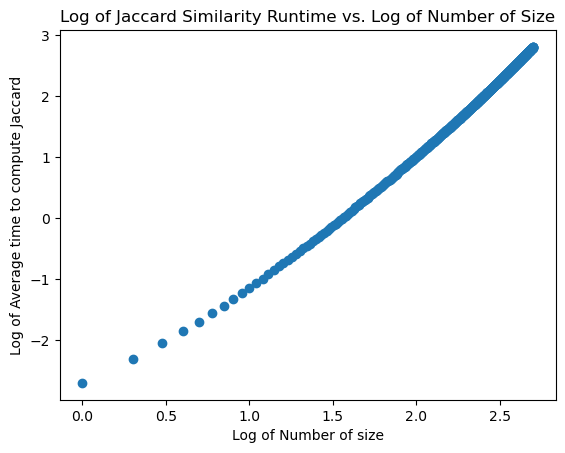

Correlation coefficient is 0.9969197237657302, Slope is 2.334349635193318, intercept is -3.5820472899712903 and intercept error is 0.018988074774978426


In [143]:
import math
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.stats import linregress
from multiprocessing import Pool
import pandas as pd
data = pd.read_csv('data2023.csv', index_col=0)

full_data=data.values

# Function to segment a matrix into submatrices
def segment(M):
    n = len(M) // 2
    a = M[:n, :n]
    b = M[:n, n:]
    c = M[n:, :n]
    d = M[n:, n:]
    return a, b, c, d

# Function to build a matrix from submatrices
def build(a, b, c, d):
    (mm,nn)=np.shape(a)
    C=np.zeros([2*mm,2*mm])
    
    C[:mm,:mm]=a
    C[:mm,mm:]=b
    C[mm:,:mm]=c
    C[mm:,mm:]=d
            
    return C

# Strassen's algorithm for matrix multiplication
def strassen(M1, M2):
    if len(M1) <= 64:  # Base case, using normal multiplication for small matrices
        return np.dot(M1, M2)

    a, b, c, d = segment(M1)
    e, g, f, h = segment(M2)

    P1 = strassen(a, g - h)
    P2 = strassen(a + b, h)
    P3 = strassen(c + d, e)
    P4 = strassen(d, f - e)
    P5 = strassen(a + d, e + h)
    P6 = strassen(b - d, f + h)
    P7 = strassen(a - c, e + g)

    r = P5 + P4 - P2 + P6
    s = P1 + P2
    t = P3 + P4
    u = P5 - P3 - P7 + P1

    return build(r, s, t, u)

def dot(v1, v2):
    total = 0
    for i in range(0, len(v1)):
        total += v1[i] * v2[i]
    return total


def timeit(somefunc, *args, repeats=100):
    times = []
    while repeats > 0:
        starttime = time.time()
        ans = somefunc(*args)
        endtime = time.time()
        timetaken = endtime - starttime
        times.append(timetaken)
        repeats -= 1
    mean = np.mean(times)
    return mean

def cosine(index1, index2,strassen_matrices):
    #new cosine function index1 and index2 holds index values. This values are used to bring element from strassen matrices
    #strassen matrice basically holds all dot product results for every documenet pairs. this index values is used to call these values whatever it is use
    strassen_dot_product1 = strassen_matrices[index1,index1]
    strassen_dot_product2 = strassen_matrices[index2,index2]
    strassen_dot_product_result=strassen_matrices[index1,index2]
    magnitude_v1 = math.sqrt(strassen_dot_product1)
    magnitude_v2 = math.sqrt(strassen_dot_product2)
    
    if magnitude_v1 == 0 or magnitude_v2 == 0:
        return 0
    
    return strassen_dot_product_result / (magnitude_v1 * magnitude_v2)
#instead of using dot product, it is used a matrice with strassen multiplication holding all dot product results, which is just like a source

    

# Generate two random 20x20 matrices

matrices1 = first_matrices=full_data[:20,:20]
matrices2 = transpose_matrices=first_matrices.T

# Perform matrix multiplication using Strassen's algorithm
result = strassen(matrices2, matrices1) #Obtained strassen matrice holding dot product results when we used for cosine but multiplication method is strassen this time
# Extracting lower triangular matrix
lower_triangular = np.tril(result)


# Get indices of non-zero elements in lower triangular matrix
indices_lower_triangular = np.tril_indices(len(lower_triangular), k=0)
non_zero_values_dict = {}
same_index_dict={}

count=0

    
    
for i, j in zip(indices_lower_triangular[0], indices_lower_triangular[1]):
    if i !=j:
        value = lower_triangular[i, j]
        non_zero_values_dict[(i,j)]=value
   
    elif i==j:
        value = lower_triangular[i, j]
        same_index_dict[(i,j)]=value
        
        pass
        

keylist=list(non_zero_values_dict.keys())

dictkeylist=list(same_index_dict.keys())

#-----------------------------------------------------------------------------------------



#-------------------------------------------------------------------------------------------
start_index = 0
end_index = 20
step_size = 20
collect_matrices=[]
transpose_matrices=[]


repeats = 10  # Number of repetitions
times = []  # List to store times taken for each iteration
strasen_total=[]
plotresult = 10000 / 20
num_iterations = 500  # Adjust this based on the desired number of iterations so you need to always divide num size to division matrice so that you will obtain iteration
#this iteration number tell how many times is going to happen this collection process

logxs = np.log10(np.arange(1, num_iterations + 1))
start_time = time.time()
logys = []  # List to store times transformed to log

end_index = 20
for _ in range(num_iterations):
    matrices1 = first_matrices = full_data[:end_index, :20]
    collect_matrices.append(matrices1)
    end_index += 20

    total_strassen_matrix = np.zeros((20, 20)) #total_strassen conquer all dot product results for different 500 matrices. 
        #then it will be obtained dot product results for 10000x20 matrices


    for i in range(repeats):
        # Perform matrix multiplication using Strassen's algorithm
        for matrices1 in collect_matrices:
            matrices2 = matrices1.T
            result = strassen(matrices2, matrices1)
            total_strassen_matrix = total_strassen_matrix + result

            for pair in keylist:
                index1 = pair[0]
                index2 = pair[1]
                x = cosine(index1, index2, total_strassen_matrix)

        total_strassen_matrix = np.zeros((20, 20)) #total_strassen conquer all dot product results for different 125 matrices. 
        #then it will be obtained dot product results for 21000x20 matrices

    end_time = time.time()
    time_taken = end_time - start_time
    logys.append(np.log10(time_taken))

res = stats.linregress(logxs, logys)

plt.scatter(logxs, logys)
plt.xlabel("Log of Number of size")
plt.ylabel("Log of Average time to compute Jaccard")
plt.title("Log of Jaccard Similarity Runtime vs. Log of Number of Size")
plt.show()

print("Correlation coefficient is {}, Slope is {}, intercept is {} and intercept error is {}".format(res.rvalue, res.slope, res.intercept, res.intercept_stderr))


### Strassen 5000 Size 

##### The graph shows jaccard as label but it is not jaccard since I changed name of labels while I was copying. so every label is related with cosine

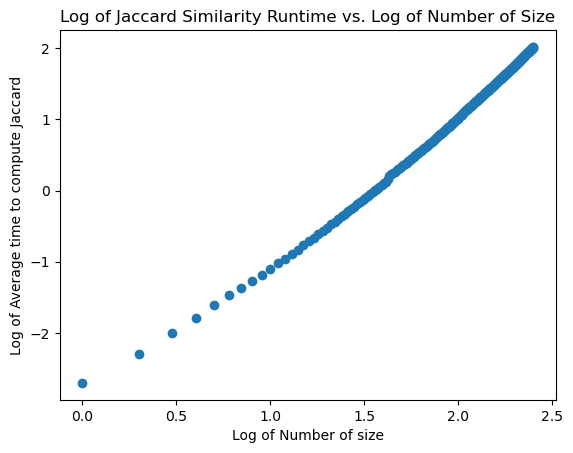

Correlation coefficient is 0.9968526505792258, Slope is 2.1867109109590217, intercept is -3.3103912603989003 and intercept error is 0.022235605573336356


In [144]:
import math
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.stats import linregress
from multiprocessing import Pool
import pandas as pd
data = pd.read_csv('data2023.csv', index_col=0)

full_data=data.values

# Function to segment a matrix into submatrices
def segment(M):
    n = len(M) // 2
    a = M[:n, :n]
    b = M[:n, n:]
    c = M[n:, :n]
    d = M[n:, n:]
    return a, b, c, d

# Function to build a matrix from submatrices
def build(a, b, c, d):
    (mm,nn)=np.shape(a)
    C=np.zeros([2*mm,2*mm])
    
    C[:mm,:mm]=a
    C[:mm,mm:]=b
    C[mm:,:mm]=c
    C[mm:,mm:]=d
            
    return C

# Strassen's algorithm for matrix multiplication
def strassen(M1, M2):
    if len(M1) <= 64:  # Base case, using normal multiplication for small matrices
        return np.dot(M1, M2)

    a, b, c, d = segment(M1)
    e, g, f, h = segment(M2)

    P1 = strassen(a, g - h)
    P2 = strassen(a + b, h)
    P3 = strassen(c + d, e)
    P4 = strassen(d, f - e)
    P5 = strassen(a + d, e + h)
    P6 = strassen(b - d, f + h)
    P7 = strassen(a - c, e + g)

    r = P5 + P4 - P2 + P6
    s = P1 + P2
    t = P3 + P4
    u = P5 - P3 - P7 + P1

    return build(r, s, t, u)

def dot(v1, v2):
    total = 0
    for i in range(0, len(v1)):
        total += v1[i] * v2[i]
    return total


def timeit(somefunc, *args, repeats=100):
    times = []
    while repeats > 0:
        starttime = time.time()
        ans = somefunc(*args)
        endtime = time.time()
        timetaken = endtime - starttime
        times.append(timetaken)
        repeats -= 1
    mean = np.mean(times)
    return mean

def cosine(index1, index2,strassen_matrices):
    #new cosine function index1 and index2 holds index values. This values are used to bring element from strassen matrices
    #strassen matrice basically holds all dot product results for every documenet pairs. this index values is used to call these values whatever it is use
    strassen_dot_product1 = strassen_matrices[index1,index1]
    strassen_dot_product2 = strassen_matrices[index2,index2]
    strassen_dot_product_result=strassen_matrices[index1,index2]
    magnitude_v1 = math.sqrt(strassen_dot_product1)
    magnitude_v2 = math.sqrt(strassen_dot_product2)
    
    if magnitude_v1 == 0 or magnitude_v2 == 0:
        return 0
    
    return strassen_dot_product_result / (magnitude_v1 * magnitude_v2)
#instead of using dot product, it is used a matrice with strassen multiplication holding all dot product results, which is just like a source

    
# Example usage:
# Generate two random 20x20 matrices

matrices1 = first_matrices=full_data[:20,:20]
matrices2 = transpose_matrices=first_matrices.T

# Perform matrix multiplication using Strassen's algorithm
result = strassen(matrices2, matrices1)
# Extracting lower triangular matrix
lower_triangular = np.tril(result)


# Get indices of non-zero elements in lower triangular matrix
indices_lower_triangular = np.tril_indices(len(lower_triangular), k=0)
non_zero_values_dict = {}
same_index_dict={}

count=0

    
    
for i, j in zip(indices_lower_triangular[0], indices_lower_triangular[1]):
    if i !=j:
        value = lower_triangular[i, j]
        non_zero_values_dict[(i,j)]=value
   
    elif i==j:
        value = lower_triangular[i, j]
        same_index_dict[(i,j)]=value
        
        pass
        

keylist=list(non_zero_values_dict.keys())

dictkeylist=list(same_index_dict.keys())

#-----------------------------------------------------------------------------------------



#-------------------------------------------------------------------------------------------
start_index = 0
end_index = 20
step_size = 20
collect_matrices=[]
transpose_matrices=[]


repeats = 10  # Number of repetitions
times = []  # List to store times taken for each iteration
strasen_total=[]
plotresult = 5000 / 20
num_iterations = 250  # Adjust this based on the desired number of iterations

logxs = np.log10(np.arange(1, num_iterations + 1))
start_time = time.time()
logys = []  # List to store times transformed to log

end_index = 20
for _ in range(num_iterations):
    matrices1 = first_matrices = full_data[:end_index, :20]
    collect_matrices.append(matrices1)
    end_index += 20

    total_strassen_matrix = np.zeros((20, 20))

    for i in range(repeats):
        # Perform matrix multiplication using Strassen's algorithm
        for matrices1 in collect_matrices:
            matrices2 = matrices1.T
            result = strassen(matrices2, matrices1)
            total_strassen_matrix = total_strassen_matrix + result

            for pair in keylist:
                index1 = pair[0]
                index2 = pair[1]
                x = cosine(index1, index2, total_strassen_matrix)

        total_strassen_matrix = np.zeros((20, 20))  #total_strassen conquer all dot product results for different 125 matrices. 
        #then it will be obtained dot product results for 5000x20 matrices


    end_time = time.time()
    time_taken = end_time - start_time
    logys.append(np.log10(time_taken))

res = stats.linregress(logxs, logys)

plt.scatter(logxs, logys)
plt.xlabel("Log of Number of size")
plt.ylabel("Log of Average time to compute Jaccard")
plt.title("Log of Jaccard Similarity Runtime vs. Log of Number of Size")
plt.show()

print("Correlation coefficient is {}, Slope is {}, intercept is {} and intercept error is {}".format(res.rvalue, res.slope, res.intercept, res.intercept_stderr))


# Conclusion

### Empirical Findings

##### Time Taken Results

*Strassen 2500 size: Cosine Similartiy:0.8444734843762127 Average time taken for 10 repetitions: 0.16032147407531738 seconds

*Cosine Dot Product 2500 size: Cosine Similartiy:0.8444734843762127 Average time taken for cosine similarity:1.8211326599121094 seconds

*Strassen 21000 size: Cosine Similartiy:0.9932762861624235 Average time taken for 10 repetitions: 1.2631607055664062 seconds

*Cosine Dot Product 21000 size:Cosine Similartiy:0.9932762861624235 Average time taken for cosine similarity:15.408129692077637 seconds
##### Plot Results

*Strassen 10000 size: Slope is 2.334349635193318

*Strassen 5000 size: Slope is 2.1867109109590217

The study begins with time tests, with 10 repetitions of input sizes of 2500 and 21000. Strassen multiplication performs faster as the input data size increases. Strassen is 13 times quicker for 21k data and 11 times faster for 2500 data, based on the ratio of Average Time of Cosine to Strassen. For both cosine dot and Strassen, the code consistently yields the same cosine similarity, verifying their comparison in a range of data sizes.


When the data size is doubled, plot findings indicate a small rise in time complexity of 0.2, which is consistent with the theoretical expectation that the complexity should be below 2.81.

In the end, in terms of time and time complexity, Strassen multiplication turns out to be significantly quicker than the cosine dot product. The divide and conquer approach, applied to a large 21555x20 matrix, involves dividing it into 20x20 matrices, performing multiplication using the Strassen method, and efficiently conquering the entire matrix.


# Main Conclusion

The evaluations and tests provide information regarding the computational efficiency of different similarity metrics. Manual cosine isn't as good as Numpy cosine, and comparisons for Jaccard and Cosine similarity and Parallel Computing and Cosine similarity indicate that more processors lead to less time complexity. Lastly, Strassen cosine becomes at to be more efficient than standard cosine, particularly when dealing with bigger datasets.


###### Report Length:1881 Words